# Fama-MacBeth Methodology

## Import Data

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import date

I put the monthly returns for the value weighted portfolios into a new .csv file. I titled the date column 'Date'.

In [2]:
returns = pd.read_csv("portfolio_returns_VW.csv", index_col='Date', na_values=[-999, -99.99])
returns.index = pd.to_datetime(returns.index, format='%Y%m')
returns = returns.loc[date(1995, 1, 1):date(2020, 10, 1)]
returns.tail()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,11.0265,2.4121,6.8074,4.4294,6.0512,5.4178,2.9359,3.6917,2.8693,2.8376,...,2.1565,0.6645,-0.7638,2.6486,1.8758,5.1105,-1.0308,-0.6403,-1.8727,2.1123
2020-07-01,-0.1979,1.4539,2.8171,-0.5919,5.0195,0.8439,3.6578,3.3505,1.9185,2.9552,...,5.9581,7.6874,6.3603,2.7130,2.2014,7.7238,5.1651,4.3200,1.7426,2.9417
2020-08-01,3.4792,4.5588,4.6873,5.3661,5.5971,7.6533,7.0296,4.7950,3.1302,9.1488,...,4.3987,3.6593,4.5737,4.5615,3.7617,10.7904,6.4440,2.4304,2.7702,3.4831
2020-09-01,-1.1915,-0.4151,-4.7450,-3.5820,-2.9179,0.3682,-4.9898,-5.1678,-6.9048,-5.1615,...,1.0022,-2.5957,-3.4875,-3.0563,-4.8935,-4.5508,-3.5645,-1.2523,-4.6709,-6.1118
2020-10-01,-2.8363,-1.2517,0.0948,3.0992,0.6511,-2.2818,4.0725,2.2521,5.7663,5.9573,...,1.3629,2.0839,1.8569,1.9488,1.9167,-4.5711,0.0030,-0.0869,-2.3244,0.9883


I put the factor values into a new .csv file too. I titled the date column 'Date' again.

In [3]:
factors = pd.read_csv("three_factors.csv", index_col='Date')
factors.index = pd.to_datetime(factors.index, format='%Y%m')
factors = factors.loc[date(1995, 1, 1):date(2020, 10, 1)]
factors.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1995-01-01,1.80,-3.50,2.54,0.42
1995-02-01,3.63,-0.66,1.13,0.40
1995-03-01,2.19,-0.19,-2.15,0.46
1995-04-01,2.11,-0.54,1.73,0.44
1995-05-01,2.90,-2.53,2.20,0.54


Import unemplyment rate csv file. Merge with existing factors DataFrame.

In [4]:
unemp = pd.read_csv("UNRATE.csv", index_col='DATE')
unemp.index.rename('Date', inplace=True)
unemp.index = pd.to_datetime(unemp.index, format='%Y-%m-%d')
factors = factors.merge(unemp, how='inner', on='Date')
factors.head()

,Mkt-RF,SMB,HML,RF,UNRATE
Date,,,,,
1995-01-01,1.80,-3.50,2.54,0.42,5.6
1995-02-01,3.63,-0.66,1.13,0.40,5.4
1995-03-01,2.19,-0.19,-2.15,0.46,5.4
1995-04-01,2.11,-0.54,1.73,0.44,5.8
1995-05-01,2.90,-2.53,2.20,0.54,5.6


In [5]:
# Calculate excess returns using the 'RF' column in the 'factors' DataFrame
excess_returns = returns.sub(factors['RF'], axis=0)
excess_returns.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-01,1.1091,2.0547,2.7976,1.5733,1.9446,-2.5693,-0.9086,-0.6585,-0.9308,-0.1817,...,-0.2599,0.9509,0.6487,2.9525,4.5262,2.3211,1.2776,3.1680,3.9381,6.3068
1995-02-01,1.7474,3.1569,1.9673,1.5923,2.9261,3.0985,3.6031,3.1656,2.6779,5.5803,...,3.8493,4.3159,4.6376,3.4444,4.9862,3.1490,4.2030,2.6685,3.1780,6.8951
1995-03-01,0.3343,1.4403,0.8848,0.5006,0.3654,3.7300,1.3557,2.4045,1.5049,1.5386,...,2.6561,3.0903,1.8515,1.3561,-0.3054,2.2475,3.5084,3.1068,-0.0336,0.6458
1995-04-01,1.1997,2.3597,3.1278,1.6883,3.5224,-0.5847,1.2690,3.0624,1.8335,2.9746,...,0.1715,1.6624,2.8350,0.6704,3.5531,2.2362,2.8043,2.1012,1.9295,5.6711
1995-05-01,1.0651,1.4816,1.5769,1.0436,2.6021,0.3895,0.9926,1.0403,2.0492,2.1312,...,1.5759,0.8412,1.8950,3.2523,4.6527,3.3145,2.3161,3.9458,5.8167,5.4362


## Fama-MacBeth

In [6]:
# Create DataFrames for storing the factor coefficients
rolling_beta = pd.DataFrame(index=excess_returns.index, columns=excess_returns.columns)
rolling_SMB = pd.DataFrame(index=excess_returns.index, columns=excess_returns.columns)
rolling_HML = pd.DataFrame(index=excess_returns.index, columns=excess_returns.columns)
rolling_unemp = pd.DataFrame(index=excess_returns.index, columns=excess_returns.columns)

In [7]:
# Using time series regression, obtain the factor coefficients for each portfolio at each point in time
# At each point in time, the previous 60 months of data is used
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

exog = factors[['Mkt-RF', 'SMB', 'HML', 'UNRATE']] # Can vary this as required
exog = sm.add_constant(exog)
for label, content in excess_returns.iteritems():
    endog = content
    rols = RollingOLS(endog, exog, window=60)
    rres = rols.fit(cov_type='HAC', cov_kwds={'maxlags': 1})
    rolling_beta[label] = rres.params['Mkt-RF']
    rolling_SMB[label] = rres.params['SMB']
    rolling_HML[label] = rres.params['HML']
    rolling_unemp[label] = rres.params['UNRATE']
rolling_unemp.tail()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,0.432378,-0.143047,0.048373,-0.094475,0.175362,-0.140329,-0.245572,-0.281989,-0.332100,0.465595,...,0.020784,-0.076887,-0.140497,0.061873,-0.014410,-0.003120,0.025623,-0.172659,-0.133899,-0.062345
2020-07-01,0.314131,-0.172213,0.049900,-0.140646,0.223635,-0.208878,-0.231154,-0.258359,-0.310017,0.398155,...,0.013709,-0.026475,-0.100873,0.008595,-0.071623,0.017126,0.005841,-0.172813,-0.183431,-0.127854
2020-08-01,0.277172,-0.190746,0.041856,-0.126657,0.214389,-0.197365,-0.231339,-0.285688,-0.306254,0.414527,...,-0.022437,-0.078543,-0.127231,-0.025767,-0.083767,0.019379,0.008113,-0.198585,-0.192413,-0.139004
2020-09-01,0.295667,-0.118043,0.026845,-0.111607,0.240790,-0.112072,-0.240698,-0.280157,-0.337936,0.407910,...,0.050955,-0.048701,-0.094415,0.011442,-0.050150,-0.017194,0.008634,-0.153982,-0.181477,-0.112403
2020-10-01,0.221098,-0.156592,-0.014002,-0.131217,0.176781,-0.167243,-0.207352,-0.278472,-0.313238,0.413739,...,0.082377,-0.016715,-0.071001,0.008656,-0.067438,-0.021696,0.045890,-0.131109,-0.200614,-0.116317


### CAPM

In [8]:
# At each point in time, run a cross-sectional regression
from sklearn.linear_model import LinearRegression

alpha = []
gamma1 = []
reg = LinearRegression()
for index, beta in rolling_beta.iloc[60:].iterrows():
    df = pd.DataFrame({'Beta': beta})
    X = np.array(df).reshape(-1, 1)
    y = excess_returns.loc[index] 
    reg.fit(X, y)
    gamma1.append(reg.coef_[0])
    alpha.append(reg.intercept_)

In [9]:
# Calculate t-statistics
alpha_mean = np.mean(np.array(alpha))
gamma1_mean = np.mean(np.array(gamma1))
alpha_std = np.std(np.array(alpha))
gamma1_std = np.std(np.array(gamma1))
T = len(rolling_beta.iloc[60:])
alpha_t = alpha_mean * math.sqrt(T) / alpha_std
gamma1_t = gamma1_mean * math.sqrt(T) / gamma1_std
print("Test Statistics:\n")
print(f"Pricing error: {alpha_t:.4f}")
print(f"Market excess return: {gamma1_t:.4f}")

Test Statistics:

Pricing error: 1.7175
Market excess return: -0.5607


### Three-Factor

In [10]:
alpha = []
gamma1 = []
gamma2 = []
gamma3 = []
reg = LinearRegression()
for index, beta in rolling_beta.iloc[60:].iterrows():
    smb = rolling_SMB.loc[index] 
    hml = rolling_HML.loc[index] 
    df = pd.DataFrame({'Beta': beta, 'SMB': smb, 'HML': hml})
    X = np.array(df).reshape(-1, 3)
    y = excess_returns.loc[index] 
    reg.fit(X, y)
    gamma1.append(reg.coef_[0])
    gamma2.append(reg.coef_[1])
    gamma3.append(reg.coef_[2])
    alpha.append(reg.intercept_)

In [11]:
alpha_mean = np.mean(np.array(alpha))
gamma1_mean = np.mean(np.array(gamma1))
gamma2_mean = np.mean(np.array(gamma2))
gamma3_mean = np.mean(np.array(gamma3))
alpha_std = np.std(np.array(alpha))
gamma1_std = np.std(np.array(gamma1))
gamma2_std = np.std(np.array(gamma2))
gamma3_std = np.std(np.array(gamma3))
T = len(rolling_beta.iloc[24:])
alpha_t = alpha_mean * math.sqrt(T) / alpha_std
gamma1_t = gamma1_mean * math.sqrt(T) / gamma1_std
gamma2_t = gamma2_mean * math.sqrt(T) / gamma2_std
gamma3_t = gamma3_mean * math.sqrt(T) / gamma3_std
print("Test Statistics:\n")
print(f"Pricing error: {alpha_t:.4f}")
print(f"Market excess return: {gamma1_t:.4f}")
print(f"SMB: {gamma2_t:.4f}")
print(f"HML: {gamma3_t:.4f}")

Test Statistics:

Pricing error: 3.2039
Market excess return: -1.1334
SMB: 0.9876
HML: 0.2406


### With Unemployment

In [12]:
alpha = []
gamma1 = []
gamma2 = []
gamma3 = []
gamma4 = []
reg = LinearRegression()
for index, beta in rolling_beta.iloc[60:].iterrows():
    smb = rolling_SMB.loc[index] 
    hml = rolling_HML.loc[index] 
    unrate = rolling_unemp.loc[index] 
    df = pd.DataFrame({'Beta': beta, 'SMB': smb, 'HML': hml, 'UNRATE': unrate})
    X = np.array(df).reshape(-1, 4)
    y = excess_returns.loc[index] 
    reg.fit(X, y)
    gamma1.append(reg.coef_[0])
    gamma2.append(reg.coef_[1])
    gamma3.append(reg.coef_[2])
    gamma4.append(reg.coef_[3])
    alpha.append(reg.intercept_)

In [13]:
alpha_mean = np.mean(np.array(alpha))
gamma1_mean = np.mean(np.array(gamma1))
gamma2_mean = np.mean(np.array(gamma2))
gamma3_mean = np.mean(np.array(gamma3))
gamma4_mean = np.mean(np.array(gamma4))
alpha_std = np.std(np.array(alpha))
gamma1_std = np.std(np.array(gamma1))
gamma2_std = np.std(np.array(gamma2))
gamma3_std = np.std(np.array(gamma3))
gamma4_std = np.std(np.array(gamma4))
T = len(rolling_beta.iloc[24:])
alpha_t = alpha_mean * math.sqrt(T) / alpha_std
gamma1_t = gamma1_mean * math.sqrt(T) / gamma1_std
gamma2_t = gamma2_mean * math.sqrt(T) / gamma2_std
gamma3_t = gamma3_mean * math.sqrt(T) / gamma3_std
gamma4_t = gamma4_mean * math.sqrt(T) / gamma4_std
print("Test Statistics:\n")
print(f"Pricing error: {alpha_t:.4f}")
print(f"Market excess return: {gamma1_t:.4f}")
print(f"SMB: {gamma2_t:.4f}")
print(f"HML: {gamma3_t:.4f}")
print(f"UNRATE: {gamma4_t:.4f}")

Test Statistics:

Pricing error: 3.8203
Market excess return: -1.4632
SMB: 0.8845
HML: -0.1150
UNRATE: -0.0650


### Unemployment Beta

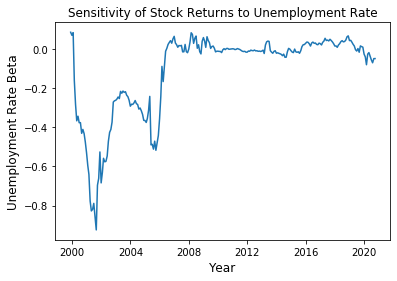

In [14]:
plt.plot(rolling_unemp.mean(axis=1))
plt.title("Sensitivity of Stock Returns to Unemployment Rate", fontsize=12)
plt.ylabel("Unemployment Rate Beta", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.savefig("Unemployment Beta.png")
plt.show()